In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

### Get the dataset

In [4]:
# Add header to the data dataframe
column_name = ['user_id', 'item_id', 'rating', 'timestamp']   # user_id-> id of the user who has given the rating, item_id->id of the movie, timestamp-> after how many days of watching the movie was the rating given

df = pd.read_csv('u.data', sep = '\t', names = column_name)             # file currently is tab seperated values, hence convert it to comma sepeated

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df['user_id'].nunique()     # to find number of unique users; nunique is a pandas method used to find number of unique observations in the list

943

In [7]:
df['item_id'].nunique()     # to find number of unique movies

1682

In [8]:
movie_titles = pd.read_csv('u.item', sep = '\|', header = None)   # sepeator in the file is |, hence set sep to |

In [9]:
movie_titles = movie_titles.iloc[:, :2]  # u.item has movie id in the 0-th column and movie name in the 1st column 

In [10]:
movie_titles.columns = ['item_id', 'title']         #you can add column names using .columns also; just column name not entire column

In [11]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df = pd.merge(df, movie_titles, on = 'item_id')    #in on we specify the key, on whose basis we have to merge the dataframes,  The key is the common column that the two DataFrames will be joined on. 

In [13]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### Exploratory Data Analysis

In [14]:
df.groupby('title')            #to group all the movies with same name together
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [15]:
df.groupby('title').mean()['rating'].sort_values(ascending = False)       #we take mean of all the ratings given for a movie by multiple users and find out the movie with max rating

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [16]:
df.groupby('title').count()['rating'].sort_values(ascending = False) #we first group the movies and then count how many number of ratings are given for that movie and then find out the max rating  

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [17]:
#To create a dataframe of mean ratings and their count

ratings = pd.DataFrame(df.groupby('title').mean()['rating'])      #dataframe of mean values of ratings

In [18]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])     #append a column named number of ratings, to the rating dataframe

In [19]:
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [20]:
ratings.sort_values(by = 'rating', ascending = False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


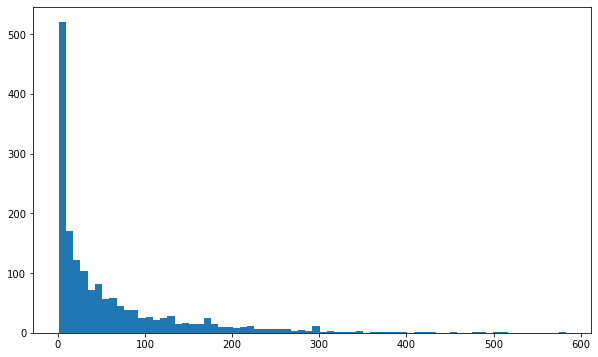

In [21]:
# we can plot a hsitogram to look at the distribution of rating with number of ratings

plt.figure(figsize = (10,6))
plt.hist(ratings['number of ratings'], bins = 70)         #we have number of ratings on x-axis and their count on y-axis; how many times a particular number of rating appears in the dataframe
plt.show()

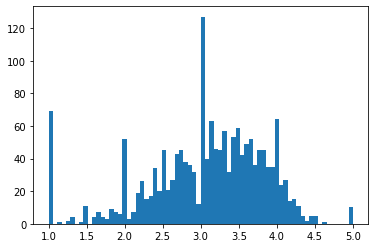

In [22]:
plt.hist(ratings['rating'], bins = 70)
plt.show()                                     # count of a particular rating; how many times a particular rating is given

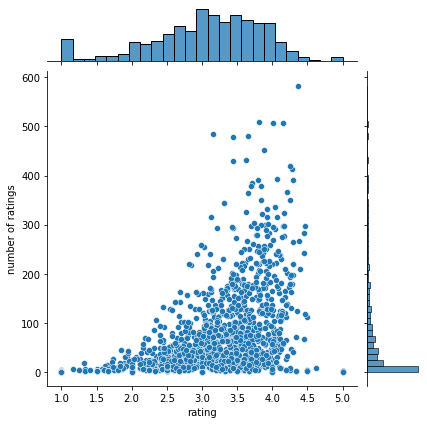

In [23]:
sns.jointplot(x = 'rating', y = 'number of ratings', data = ratings)     # as the average rating increases the count of that rating also increase, i.e more people have given ratings like 3, 3.5, 4

### Movie Recommender

In [24]:
df                     #all titles are grouped together; rating for each movie is given; not avg rating, since you didn't assign it to df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [25]:
# Create the movie matrix

movie_mat = df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Since the movie star wars had the highest number of rating count, assume that it is the most popular movie since many people have watched it

# create a list of ratings that was given to star wars by the user

idx = movie_mat.columns.get_loc('Star Wars (1977)')
starwars_user_rating = movie_mat.iloc[:, idx]

In [27]:
starwars_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [28]:
# we find the correlation of the movie star wars with all the other movies

similar_to_starwars = movie_mat.corrwith(starwars_user_rating)    # it relates the user rating column of starwars with every movie's rating and finds out how similar or correlated they are
similar_to_starwars          # if both tables have NaN rating, then corrrelation doesn't exist

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [30]:
corr_with_starwars = pd.DataFrame(similar_to_starwars, columns = ['Correlation'])
corr_with_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [33]:
# to drop the NaN values in the corr_with_starwars, we can use dropna method
corr_with_starwars.dropna(inplace = True)     #dropna doesn't assign the dropped values table to dataframe, hence next time you call dataframe you get same, NaN values, hence write inplace = true to assign it to dataframe
corr_with_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [36]:
corr_with_starwars.sort_values(by = ['Correlation'], ascending = False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [38]:
# we will consider only those movies which are rated by a lot of users
corr_with_starwars = corr_with_starwars.join(ratings['number of ratings'])    #it will join the number of ratings column of ratings dataframe with the same index in corrwith starwars

In [41]:
corr_with_starwars[corr_with_starwars['number of ratings']>100].sort_values(by = ['Correlation'], ascending = False) #inside the dataframe's column number of ratings, show only those values which are greater than 100

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


### Prediction Function

In [42]:
def prediction(movie_name):
    idx = movie_mat.columns.get_loc(movie_name)            #get user ratings of the given movie
    movie_user_rating = movie_mat.iloc[:, idx]
   
    similar_to_movie = movie_mat.corrwith(movie_user_rating)    # find correlation of this movie with all the movies
    corr_with_movie = pd.DataFrame(similar_to_movie, columns = ['Correlation'])     #build the correlation matrix
    
    corr_with_movie.dropna(inplace = True)               #drop the NaN values from it and assign it to the matrix
    
    corr_with_movie = corr_with_movie.join(ratings['number of ratings'])  #join the number of ratings column from ratings dataframe
    predictions = corr_with_movie[corr_with_movie['number of ratings']>100].sort_values(by = ['Correlation'], ascending = False)
    #take only those correlated movies which have higher number of user ratings
    return predictions

In [63]:
results = prediction('Seven (Se7en) (1995)')

In [64]:
results.head()

,Correlation,number of ratings
title,,
Seven (Se7en) (1995),1.000000,236
Good Will Hunting (1997),0.537958,198
"Nightmare on Elm Street, A (1984)",0.492304,111
Cape Fear (1991),0.454740,171
"Devil's Advocate, The (1997)",0.445927,188
